Create a function that returns smallest even number

In [88]:
def smallest_even(integers = list): 
    for integer in integers:
        try:
            int(integer)
        except: 
            integers.remove(integer)
            print("non integers detected")
    evens = []
    for integer in integers: 
        if integer % 2 == 0 and integer > 0: 
            evens.append(integer)
    if len(evens) > 0: 
        return min(evens)
    else: 
        return None

Create a function that removes comma and all words shorter than 4

In [172]:
 def remover(a = str): 
     b = a.split(" ")
     c = [chr.replace(",", "") for chr in b] 
     for element in c[:]: 
         if len(element) < 4: 
             c.remove(element)
     d = str(c)
     return d



Create an array A with 5 rows and 7 columns containing the numbers 1 to 35, where the first column contains the numbers 1 to 5, the second column the numbers 6 to 10 and so on. Create a second array B that results from swapping the first and the last column of the array A. Print the product of
all of the elements in B
the elements in the third column of B
the elements in the last row of B

In [288]:
import numpy as np
import random as rd
mean = 1
std = 2
rng = np.random.default_rng(12345)
a = rng.normal(loc = 1, scale = std, size = (4,6))
b = a[2:, :4]
c = np.matmul(b,a)

            

In [173]:
def space_remover(a = str):
    space = chr(8888)
    
    #find spaces
    text_no_spaces = list(a)
    coordinates = [pos for pos, char in enumerate(a) if char == " "]
    for coordinate in coordinates: 
        text_no_spaces[coordinate] = space            
       
    return text_no_spaces

def tokenize(a = str): 
    space_remover(a)
    tokenized = []
    for chr in text_no_spaces: 
        tokenized.append(ord(chr))
    return tokenized






Read the file 'ATX.csv' that you can find in the folder Course Material / data into a pandas DataFrame, turning the Date column into a DatetimeIndex. Replace missing values with the last previous available value. Plot the time series of the Adjusted Close.















<Axes: xlabel='Date'>

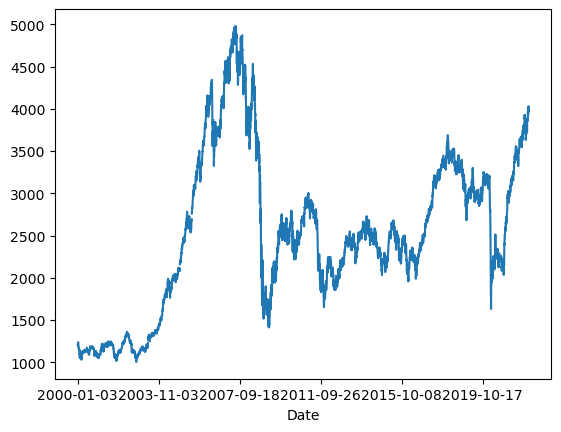

In [10]:


import pandas as pd
atx = pd.read_csv("C:\\Users\\Hry\\OneDrive\\Dokumenty\\Škola\\Masters\\Python for Finance\\quiz\\data\\ATX.csv", index_col = "Date")
atx.ffill()
atx["Adj Close"].plot()


Read the files 'ATX.csv' and 'OMV.csv' that you can find in the folder Course Material / data into pandas DataFrames, turning the Date column into a DatetimeIndex. Estimate rolling market betas (where the ATX serves as the market index) for OMV by regressing OMV's daily returns on the daily returns of the ATX. Use a rolling window of 252 days. Plot the estimates of beta over time.

In [25]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import linearmodels as lm 
import datetime 
from stargazer.stargazer import Stargazer 
from pandas_datareader.famafrench import get_available_datasets 
from collections import OrderedDict 
from statsmodels.regression.rolling import RollingOLS 
from linearmodels.datasets import card 
from sklearn.linear_model import LinearRegression

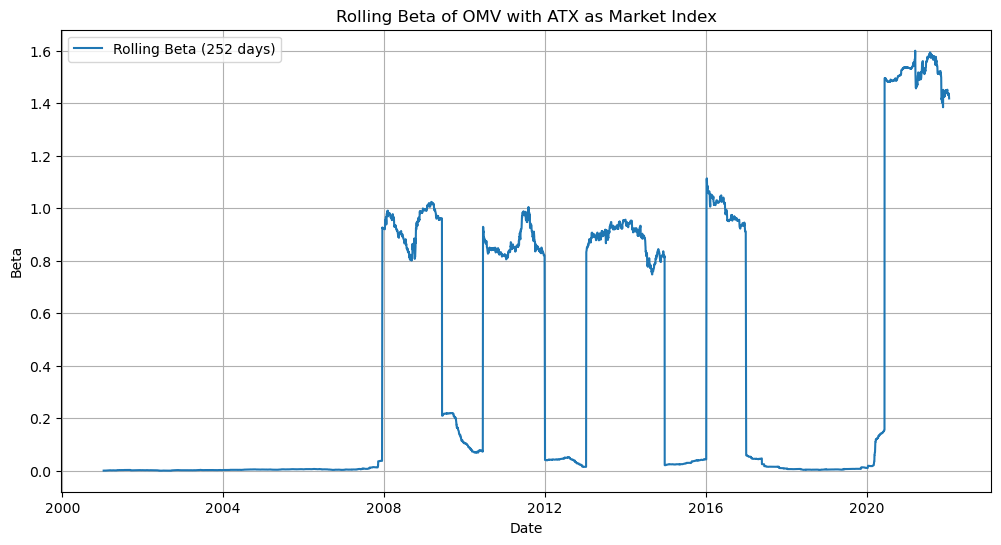

In [51]:
atx = pd.read_csv("C:\\Users\\Hry\\OneDrive\\Dokumenty\\Škola\\Masters\\Python for Finance\\quiz\\data\\ATX.csv", index_col = "Date", parse_dates=True)
omv = pd.read_csv("C:\\Users\\Hry\\OneDrive\\Dokumenty\\Škola\\Masters\\Python for Finance\\quiz\\data\\omv.csv", index_col = "Date", parse_dates=True)
atx = atx.fillna(0)
omv = omv.fillna(0)

atx["Returns" ] = atx["Adj Close"].pct_change()
omv["Returns" ] = omv["Adj Close"].pct_change()

data=pd.merge(atx[["Returns"]],omv[["Returns"]], left_index = True, right_index = True, suffixes=('_atx', '_omv'))

window = 252
betas = [] 

data = data.replace([np.inf, -np.inf], np.nan).dropna()

for start in range(len(data) - window + 1): 
    subset = data.iloc[start:start + window]
    y = subset["Returns_omv"]
    X= sm.add_constant(subset["Returns_atx"])
    model = sm.OLS(y, X).fit()
    betas.append(model.params["Returns_atx"])

data['Beta'] = [np.nan] * (window - 1) + betas

# Plot rolling beta over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Beta'], label='Rolling Beta (252 days)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Rolling Beta of OMV with ATX as Market Index')
plt.legend()
plt.grid()
plt.show()

#prettify_result(model_beta)

Create an array A with 5 rows and 7 columns containing the numbers 1 to 35, where the first column contains the numbers 1 to 5, the second column the numbers 6 to 10 and so on. Create a second array B that results from swapping the first and the last column of the array A. Print the product of 

all of the elements in B
the elements in the third column of B
the elements in the last row of B

In [134]:
a = [i for i in range(1,36,1)]
a = np.array(a)
a.resize(7,5)
a = np.transpose(a)
first_last = a[:, [0,-1]] 
last_first = a[:, [-1,0]] 
b =  a.copy()
b[:,0] = a[:,-1] 
b[:, -1] = a[:,0]

#product of all the elements in B
product_b = np.prod(b)
print(product_b)
print(np.prod(b[:,3]))
print(np.prod(b[-1,:]))



0
1860480
393750000


Read the file 'ATX.csv' that you can find in the folder Course Material / data into a pandas DataFrame, turning the Date column into a DatetimeIndex. Drop all columns of the DataFrame except for  the Adjusted Close. Change the frequency of the data from daily to monthly, using the values at the end of the month. Compute and print the mean and the standard deviation of the monthly returns.

In [145]:
atx = pd.read_csv("C:\\Users\\Hry\\OneDrive\\Dokumenty\\Škola\\Masters\\Python for Finance\\quiz\\data\\ATX.csv", index_col = "Date", parse_dates=True)
atx = atx["Adj Close"]
atx = atx.resample("ME").last()
std = atx.std()
print(std)
mean = atx.mean()
print(mean)
atx

937.4523195497346
2546.134748098113


Date
2000-01-31    1126.010010
2000-02-29    1094.619995
2000-03-31    1130.069946
2000-04-30    1132.479980
2000-05-31    1131.069946
                 ...     
2021-09-30    3658.929932
2021-10-31    3721.189941
2021-11-30    3661.459961
2021-12-31    3861.060059
2022-01-31    3979.939941
Freq: ME, Name: Adj Close, Length: 265, dtype: float64

Create an array A with 4 rows and 6 columns containing numbers randomly drawn from a normal distribution with mean of 1 and a standard deviation of 2. Create a second array B containing a slice of A comprising the last two rows and the first four columns. Multiply B an A using matrix multiplication.



In [171]:
rng = np.random.default_rng(12345)
mean = 1
std = 2

A = std * np.random.randn(24) + mean
A = A.reshape(4,6)
B = A[-2:, :4]
np.matmul(B,A)



array([[ 8.41266173,  5.60401989, 15.50228317, 11.88585379,  8.5676553 ,
        19.82098192],
       [ 1.2752876 , -1.95774145, -3.07598348,  3.55797725, -7.32744347,
         0.52893322]])